# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import time
import twython
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
weRateDogs_df = pd.read_csv('twitter_archive_enhanced.csv')
weRateDogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image_predictions.tsv', sep = '\t', 
                                   engine='python', encoding = 'utf-8')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [503]:
"""
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)
"""

In [504]:
demo_weRateDogs_df = weRateDogs_df.head()

start = time.time()
demo_tweets_found = []
# save non-found tweets here
demo_tweets_not_found = []
with open ('demo_tweet_json.txt', 'w', encoding = 'utf8') as file:
    for tweet_id in demo_weRateDogs_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            demo_tweets_not_found.append(tweet_id)
            pass        
            
end = time.time()
print(f'it took a runtime of {end - start} seconds')
print(f'there are {len(demo_tweets_not_found)} non found tweets')
print(f'there are {len(demo_tweets_found)} found tweets')


it took a runtime of 2.2125473022460938 seconds
there are 0 non found tweets
there are 0 found tweets


In [505]:
start = time.time()
tweets_found = []
# save non-found tweets here
tweets_not_found = []
with open ('tweet_json.txt', 'w', encoding = 'utf8') as file:
    for tweet_id in weRateDogs_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            tweets_not_found.append(tweet_id)
            pass        
            
end = time.time()
print(f'it took a runtime of {end - start} seconds')


Rate limit reached. Sleeping for: 444
Rate limit reached. Sleeping for: 518


it took a runtime of 1960.1772410869598 seconds


In [5]:
# gather tweets line by line 
list_of_tweets = []
with open('tweet_json.txt') as file:
    for line in file:
        list_of_tweets.append(json.loads(line))

# transform list_of_tweets into dataframe        
tweets_df = pd.DataFrame(list_of_tweets, columns = ['id',
                                                    'retweet_count',
                                                    'favorite_count'])

#
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7056,33985
1,892177421306343426,5333,29468
2,891815181378084864,3505,22182
3,891689557279858688,7262,37114
4,891327558926688256,7806,35475


In [6]:
# save tweet_data to csv
tweets_df.to_csv('tweets_df.csv', index = False)

In [7]:
# verify if csv was saved correctly
tweets_df = pd.read_csv('tweets_df.csv')
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7056,33985
1,892177421306343426,5333,29468
2,891815181378084864,3505,22182
3,891689557279858688,7262,37114
4,891327558926688256,7806,35475


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
# view a few lines of data
weRateDogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
weRateDogs_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
322,834167344700198914,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344...,11,10,Sunshine,None,None,None,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeus. He's downright fabulous. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,None,None,None,None
915,757354760399941633,NaN,NaN,2016-07-24 23:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/757354760...,8,10,Devón,None,None,None,None


In [10]:
weRateDogs_df[weRateDogs_df.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [11]:
weRateDogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
weRateDogs_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
weRateDogs_df.shape

(2356, 17)

In [14]:
weRateDogs_df.duplicated().sum()

0

In [15]:
weRateDogs_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
weRateDogs_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Hero         1
Lorelei      1
Doobert      1
Beya         1
Beebop       1
Name: name, Length: 957, dtype: int64

In [17]:
weRateDogs_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [18]:
weRateDogs_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [19]:
weRateDogs_df['expanded_urls'].str.extract('(\d+)').astype(str)

,0
0,892420643555336193
1,892177421306343426
2,891815181378084864
3,891689557279858688
4,891327558926688256
...,...
2351,666049248165822465
2352,666044226329800704
2353,666033412701032449
2354,666029285002620928


In [20]:
weRateDogs_df['expanded_urls'].isnull().sum()

59

In [21]:
weRateDogs_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
weRateDogs_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
weRateDogs_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
weRateDogs_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
weRateDogs_df['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [26]:
weRateDogs_df.source.duplicated().sum()

2352

In [27]:
weRateDogs_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [28]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7056,33985
1,892177421306343426,5333,29468
2,891815181378084864,3505,22182
3,891689557279858688,7262,37114
4,891327558926688256,7806,35475


In [29]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [30]:
tweets_df.duplicated().sum()

0

In [31]:
tweets_df.isna().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [32]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_predictions_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
image_predictions_df.duplicated().sum()

0

In [36]:
image_predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [37]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
687,684122891630342144,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,1,cheetah,0.822193,False,Arabian_camel,0.046976,False,jaguar,0.025785,False
1136,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,Pembroke,0.939134,True,Cardigan,0.054336,True,Chihuahua,0.005590,True


In [38]:
is_dog = image_predictions_df.p1_dog & image_predictions_df.p2_dog & image_predictions_df.p3_dog
is_dog.value_counts()

True     1243
False     832
dtype: int64

In [39]:
image_predictions_df.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [40]:
image_predictions_df[image_predictions_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [41]:
image_predictions_df.jpg_url.nunique()

2009

In [42]:
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [43]:
image_predictions_df.shape

(2075, 12)

In [46]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Quality issues

#### WeRateDogs Twitter archive data

1. Datatype issues: 
 - tweet_id, in_reply_to_status_id, in_reply_to_user_id, is an integer. These should be strings
 - timestamp is a string instead of datetime
 
 
2. simplify source url to txt instead

3. not all values in rating_denominator column are 10

4. extreme rating_numerator values

5. erroneous dog names such as 'a', 'an', etc

6. retweets represent the same dog

#### Image Predictions

7. Some of the images do not resembles dogs i.e p1_dog == False & p2_dog == False & p3_dog

8. there are duplicated jpg_url

9. img_num column is misleading. Drop it.


### Tidiness issues

1. doggo, floofer, pupper, puppo represent dog stages and so must be collapsed

2. merge all data sets on the appropriate keys

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
# Make copies of original pieces of data
weRateDogs_df_clean = weRateDogs_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweets_df_clean = tweets_df.copy()


In [48]:
tweets_df

,id,retweet_count,favorite_count
0,892420643555336193,7056,33985
1,892177421306343426,5333,29468
2,891815181378084864,3505,22182
3,891689557279858688,7262,37114
4,891327558926688256,7806,35475
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,116,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### Issue #1: Datatype Errors

#### Define: Several datatype errors were detected. IDs should be strings and not integers since these do not make meaningful computations.

#### Code

In [49]:
weRateDogs_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [50]:
d_type_convert_dict = {'tweet_id': str,
                        'in_reply_to_status_id': str,
                        'in_reply_to_user_id': str,
                        'retweeted_status_id': str                        
                      }

weRateDogs_df_clean['tweet_id'] = weRateDogs_df_clean['tweet_id'].astype(str)
weRateDogs_df_clean['in_reply_to_status_id'] = weRateDogs_df_clean['in_reply_to_status_id'].astype(str)
weRateDogs_df_clean['in_reply_to_user_id'] = weRateDogs_df_clean['in_reply_to_user_id'].astype(str)
weRateDogs_df_clean['retweeted_status_id'] = weRateDogs_df_clean['retweeted_status_id'].astype(str)
#weRateDogs_df_clean['timestamp'] = pd.to_datetime(weRateDogs_df_clean['timestamp'])


In [51]:
image_predictions_df_clean['tweet_id'] = image_predictions_df_clean['tweet_id'].astype(str)


In [52]:
tweets_df_clean['id'] = tweets_df_clean['id'].astype(str)

#### Test

In [53]:
weRateDogs_df_clean.info()
image_predictions_df_clean.info()
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:

#### Define: simplify source url to txt instead

#### Code

In [54]:
weRateDogs_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [55]:
# replace source url with txt
# create a dictionary for the sourses since they are just 3 otherwise beautiful soup
source_dict = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
                '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web Client',
             '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene'}

# create a function to replace sources
def source_replace(df):
    if df['source'] in source_dict.keys():
        txt = source_dict[df['source']]
        return txt
    else:
        return df['source']

# function call
weRateDogs_df_clean['source_txt'] = weRateDogs_df_clean.apply(source_replace, axis=1)


#### Test

In [56]:
weRateDogs_df_clean.source_txt.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Web Client               33
TweetDeck                11
Name: source_txt, dtype: int64

# Issue #3:

#### Define: not all values in rating_denominator column are 10. All rating_denominator values should be 10

#### Code

In [57]:
weRateDogs_df_clean['rating_denominator'] = weRateDogs_df_clean.query('rating_denominator != 10')['rating_denominator'] = 10

#### Test

In [58]:
weRateDogs_df_clean['rating_denominator'].unique()

array([10], dtype=int64)

## Issue 4:

#### Define: extreme rating_numerator values. These outliers do not produce reliable insights. The highest numerator from weratedogs should be 15

In [59]:
weRateDogs_df_clean['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

#### Code

#### Select only tweets with rating_numerator less than 15 and have no decimals

In [61]:
weRateDogs_df_clean = weRateDogs_df_clean.query('rating_numerator <= 15')

In [63]:
weRateDogs_df_clean[weRateDogs_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
1689,I've been told there's a slight possibility he...,5


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [69]:
weRateDogs_df_clean['ratings'] = weRateDogs_df_clean['rating_numerator'] / weRateDogs_df_clean['rating_denominator']

#### Test

In [70]:
weRateDogs_df_clean['rating_numerator'].unique()

array([13, 12, 14,  5, 11, 10,  6, 15,  0,  7,  9,  8,  1,  3,  4,  2],
      dtype=int64)

## Issue #5

#### Define: erroneous dog names such as 'a', 'an', etc

In [71]:
weRateDogs_df_clean[weRateDogs_df_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_txt,ratings
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,Twitter for iPhone,1.3
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,Twitter for iPhone,1.3
12,889665388333682689,nan,nan,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,nan,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo,Twitter for iPhone,1.3
24,887343217045368832,nan,nan,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,nan,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None,Twitter for iPhone,1.3
25,887101392804085760,nan,nan,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,nan,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None,Twitter for iPhone,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,nan,nan,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None,Twitter for iPhone,0.6
2343,666073100786774016,nan,nan,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None,Twitter for iPhone,1.0
2344,666071193221509120,nan,nan,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,nan,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None,Twitter for iPhone,0.9
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,Twitter for iPhone,0.5


In [72]:
weRateDogs_df_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

#### Code

In [73]:
# Bill is misspelt as Billl
weRateDogs_df_clean['name'] = weRateDogs_df_clean['name'].replace('Billl', 'Bill')

##### Delete rows containing wrong names 

In [74]:
# create a list of wrong names
wrong_names = ['a', 'an', 'the', 'such', 'O', 'my', 'getting', 'old', 'very', 'quite', 'None']

#subset rows not in wrong_names
weRateDogs_df_clean = weRateDogs_df_clean[~weRateDogs_df_clean.name.isin(wrong_names)]


#### Test

In [75]:
# check if the name Bill exists
weRateDogs_df_clean.query('name == "Bill"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_txt,ratings
2163,669375718304980992,nan,nan,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,nan,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Bill,None,None,None,None,Twitter for iPhone,0.6


In [76]:
# all wrong names are ignored
weRateDogs_df_clean.name.isin(wrong_names).sum()

0

In [77]:
weRateDogs_df_clean.name.value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Lola       10
           ..
Fynn        1
Dixie       1
Hero        1
Lorelei     1
Beebop      1
Name: name, Length: 943, dtype: int64

### Issue #6

#### Define: retweets represent the same dog. Keep only tweets that have images

#### Code

In [78]:
weRateDogs_df_clean = weRateDogs_df_clean[weRateDogs_df_clean.tweet_id.isin(image_predictions_df_clean.tweet_id)]

#### Test

In [79]:
# check the number of rows of tweets with images
weRateDogs_df_clean.tweet_id.isin(image_predictions_df_clean.tweet_id).sum() == len(weRateDogs_df_clean)

True

### Issue #7

#### Define: Some of the images do not resembles dogs i.e p1_dog == False & p2_dog == False & p3_dog. Drop such rows

#### Code

In [80]:
image_predictions_df_clean = image_predictions_df_clean.query('p1_dog != False & p2_dog != False & p3_dog != False')

#### Test

In [81]:
len(image_predictions_df_clean.query('p1_dog == False & p2_dog == False & p3_dog == False'))

0

### Issue #8

#### Define: there are duplicated jpg_url. This probaly points to the same dog

#### Code

In [82]:
image_predictions_df_clean = image_predictions_df_clean[~image_predictions_df_clean.jpg_url.duplicated()]

#### Test

In [83]:
image_predictions_df_clean.jpg_url.duplicated().sum()

0

In [84]:
len(image_predictions_df_clean.jpg_url)

1206

### Issue 9

#### Define: 

#### Code

#### Test

### Issue #1

#### Define: Drop unneccesary columns

#### Code

In [71]:
weRateDogs_df_clean = weRateDogs_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source', 'rating_numerator', 'rating_denominator'], axis = 1)

In [72]:
weRateDogs_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,source_txt,ratings
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,Twitter for iPhone,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,Twitter for iPhone,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,Twitter for iPhone,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,Twitter for iPhone,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,Twitter for iPhone,1.2


In [88]:
image_predictions_df_clean = image_predictions_df_clean.drop(['img_num'], axis = 1)

#### Test

In [89]:
weRateDogs_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_txt,ratings
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone,1.2


In [90]:
image_predictions_df_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Tidiness

### Issue #1

#### Define: doggo, floofer, pupper, puppo represent dog stages and so must be collapsed

In [91]:
weRateDogs_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'source_txt', 'ratings'],
      dtype='object')

#### Code

In [92]:
# melt all dog stages into one column
# replace all none values with empty strings

weRateDogs_df_clean.doggo.replace('None', '', inplace = True)
weRateDogs_df_clean.floofer.replace('None', '', inplace = True)
weRateDogs_df_clean.pupper.replace('None', '', inplace = True)
weRateDogs_df_clean.puppo.replace('None', '', inplace = True)

weRateDogs_df_clean['dog_stage'] = weRateDogs_df_clean.doggo + weRateDogs_df_clean.floofer + weRateDogs_df_clean.pupper + weRateDogs_df_clean.puppo

weRateDogs_df_clean['dog_stage'].value_counts()

               1220
pupper          121
doggo            42
puppo            16
doggopupper       6
floofer           5
Name: dog_stage, dtype: int64

In [93]:
weRateDogs_df_clean['dog_stage'] = weRateDogs_df_clean['dog_stage'].replace('doggopupper', 'doggo, pupper')

In [94]:
#weRateDogs_df_clean = weRateDogs_df_clean[weRateDogs_df_clean['dog_stage'] != '']

# drop doggo, pupper, puppo, floofer
weRateDogs_df_clean = weRateDogs_df_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis = 1)

In [95]:
weRateDogs_df_clean['dog_stage'] = weRateDogs_df_clean['dog_stage'].replace("", 'unknown')

### Drop any other unneccessary column

In [96]:
weRateDogs_df_clean = weRateDogs_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

In [82]:
image_predictions_df_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### p1, p2, p3 are confusing. Drop them

In [97]:
image_predictions_df_clean = image_predictions_df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test

In [98]:
weRateDogs_df_clean.dog_stage.value_counts()

unknown          1220
pupper            121
doggo              42
puppo              16
doggo, pupper       6
floofer             5
Name: dog_stage, dtype: int64

In [99]:
weRateDogs_df_clean

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_txt,ratings,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Twitter for iPhone,1.3,unknown
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Twitter for iPhone,1.3,unknown
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Twitter for iPhone,1.2,unknown
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Twitter for iPhone,1.3,unknown
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Twitter for iPhone,1.2,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,666691418707132416,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,Twitter for iPhone,0.8,unknown
2317,666644823164719104,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,Twitter for iPhone,0.9,unknown
2318,666454714377183233,2015-11-17 03:16:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,Twitter for iPhone,1.0,unknown
2319,666447344410484738,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,Twitter for iPhone,0.9,unknown


## Issue #2: Merge the three df togeter on tweet_id

In [100]:
rateDogsImage = pd.merge(weRateDogs_df_clean, image_predictions_df_clean, on = 'tweet_id', how = 'inner')

In [101]:
rateDogsImage.shape

(858, 15)

In [102]:
rateDogsImage.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'source_txt', 'ratings', 'dog_stage', 'jpg_url'],
      dtype='object')

In [103]:
tweets_df_clean

,id,retweet_count,favorite_count
0,892420643555336193,7056,33985
1,892177421306343426,5333,29468
2,891815181378084864,3505,22182
3,891689557279858688,7262,37114
4,891327558926688256,7806,35475
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,116,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [104]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [105]:
master_df = pd.merge(rateDogsImage, tweets_df_clean, left_on = 'tweet_id', right_on = 'id', how = 'inner')

In [106]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 850
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    851 non-null    object 
 1   timestamp                   851 non-null    object 
 2   source                      851 non-null    object 
 3   text                        851 non-null    object 
 4   retweeted_status_id         851 non-null    object 
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               851 non-null    object 
 8   rating_numerator            851 non-null    int64  
 9   rating_denominator          851 non-null    int64  
 10  name                        851 non-null    object 
 11  source_txt                  851 non-null    object 
 12  ratings                     851 non-null    float64
 13  dog_stage                   851 non

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [107]:
master_df.to_csv('twitter_archive_master.csv')

In [108]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. About 98% of the tweets were generated from the Twitter app for iPhone.

2. About 80% of dogs have an unknown dog stage.

3. There is a positive correlation between favourite and retweet counts.

### Visualization

### Distribution by sources of tweets

In [109]:
twitter_archive_master.source_txt.value_counts()

Twitter for iPhone    838
Web Client             10
TweetDeck               3
Name: source_txt, dtype: int64

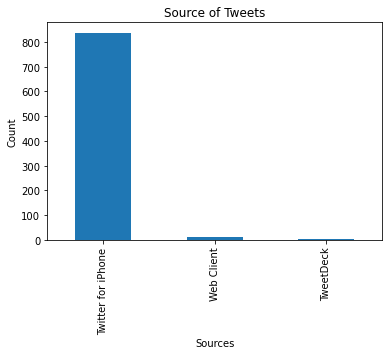

In [110]:
twitter_archive_master.source_txt.value_counts().plot(kind = 'bar')
plt.title('Source of Tweets')
plt.xlabel('Sources')
plt.ylabel('Count');

### Distribution by dog stages

In [111]:
twitter_archive_master.dog_stage.value_counts()

unknown          739
pupper            70
doggo             21
puppo             13
doggo, pupper      4
floofer            4
Name: dog_stage, dtype: int64

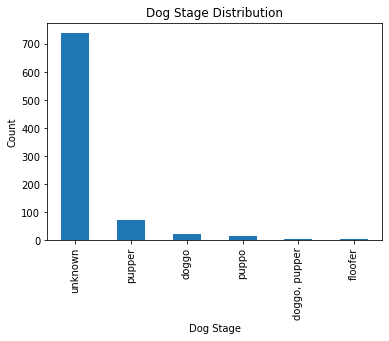

In [112]:
twitter_archive_master.dog_stage.value_counts().plot(kind = 'bar')
plt.title('Dog Stage Distribution')
plt.xlabel('Dog Stage')
plt.ylabel('Count');

### Relationship between Favourite and Retweet counts

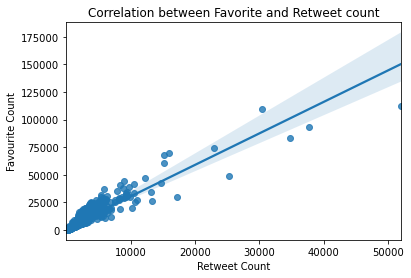

In [114]:
sns.regplot(x = 'retweet_count', y = 'favorite_count', data = twitter_archive_master)
plt.title('Correlation between Favorite and Retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count');

### Distribution by user ratings

In [115]:
twitter_archive_master.ratings.value_counts()

1.2    228
1.1    192
1.0    167
1.3    127
0.9     67
0.8     36
1.4     11
0.7     10
0.6      6
0.5      4
0.4      1
0.2      1
0.3      1
Name: ratings, dtype: int64

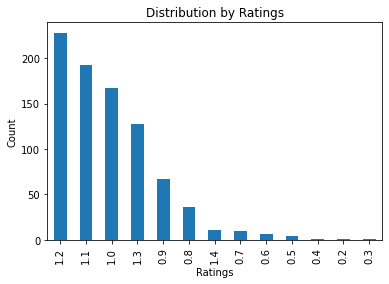

In [120]:
twitter_archive_master.ratings.value_counts().plot(kind = 'bar')
plt.title('Distribution by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count');

In [117]:
twitter_archive_master.shape

(851, 19)

In [118]:
twitter_archive_master.describe()

,Unnamed: 0,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,ratings,id,retweet_count,favorite_count
count,851.000000,8.510000e+02,0.0,0.0,0.0,851.000000,851.0,851.000000,8.510000e+02,851.000000,851.000000
mean,425.000000,7.491958e+17,NaN,NaN,NaN,10.985899,10.0,1.098590,7.491958e+17,2269.609871,8425.168038
std,245.806835,6.980439e+16,NaN,NaN,NaN,1.624022,0.0,0.162402,6.980439e+16,3603.840530,11115.849038
min,0.000000,6.664188e+17,NaN,NaN,NaN,2.000000,10.0,0.200000,6.664188e+17,19.000000,90.000000
25%,212.500000,6.816741e+17,NaN,NaN,NaN,10.000000,10.0,1.000000,6.816741e+17,583.500000,2092.000000
50%,425.000000,7.359920e+17,NaN,NaN,NaN,11.000000,10.0,1.100000,7.359920e+17,1274.000000,4522.000000
75%,637.500000,8.097371e+17,NaN,NaN,NaN,12.000000,10.0,1.200000,8.097371e+17,2664.500000,10720.500000
max,850.000000,8.921774e+17,NaN,NaN,NaN,14.000000,10.0,1.400000,8.921774e+17,52022.000000,112302.000000


### Statistics of ratings grouped by dog_stages

In [119]:
twitter_archive_master.groupby('dog_stage')['ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,21.0,1.252381,0.107792,1.1,1.200,1.30,1.300,1.4
"doggo, pupper",4.0,1.225000,0.050000,1.2,1.200,1.20,1.225,1.3
floofer,4.0,1.150000,0.129099,1.0,1.075,1.15,1.225,1.3
pupper,70.0,1.074286,0.129308,0.8,1.000,1.10,1.200,1.4
puppo,13.0,1.184615,0.134450,0.9,1.200,1.20,1.300,1.3
unknown,739.0,1.094046,0.164761,0.2,1.000,1.10,1.200,1.4
